In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('./mental-health/assets/35067-0001-Data.csv')
df.shape

(5001, 1000)

In [ ]:
#childhood columns
childhood_columns = ['CH1',
'CH1A',
'CH9',
'CH9A',
'CH13',
'CH14',
'CH16',
'CH21',
'CH22',
# 'CH23', interview checkpoint
'CH24',
'CH37A',
'CH37B',
'CH37C',
'CH37D',
'CH37E',
'CH38',
'CH38_1', #if between 12-17 and where allowed out 
'CH39',
'CH42',
'CH43',
'CH44',
'CH45',
'CH46',
'CH47_1',
'CH47_2',
'CH47_3',
'CH47_4',
'CH52',
'CH52A',
'CH60',
'CH60A',
'CH61',
'CH61A',
'CH62',
'CH74',
'CH74_1',
'CH74_2',
'CH74_2A',
'CH74_2B',
'CH74_2C',
'CH74_2D',
'CH74_2E',
'CH74_2F',
'CH75',
'CH76',
'CH76_1',
'CH76_2',
'CH76_3',
'CH76_4',
'CH81',
'CH81A',
'CH89',
'CH89A',
'CH90',
'CH90A',
'CH91',
'CH103',
'CH104',
'CH105',
'CH105A',
'CH105B',
'CH105C',
'CH105D',
'CH105E',
'CH105F']
childhood_numerical_col = ['CH13','CH14','CH16','CH21','CH22','CH24','CH38','CH43','CH45']

In [ ]:
#demographic columns
demographic_columns = ['RESPID','REGION',
'HHSIZE',
'RESEX',
'AGE',
'AGECAT',
# 'AGE18_34',
# 'AGE35_49',
# 'AGE50_64',
# 'AGE65',
'EDUCAT',
# 'EDU0_11',
# 'EDU12',
# 'EDU13_15',
# 'EDU16',
'MARCAT',
# 'MAR_COH',
# 'MAR_SWD',
# 'MAR_NEV',
'EMPCAT',
# 'EMP_WORK',
# 'EMP_STU',
# 'EMP_HM',
# 'EMP_RET',
# 'EMP_OTH',
'PEREARN2',
'SPEARN2',
'OTHINC2',
'HHINCOME2',
'INCPERCAP2',
# 'INCWMH2',
'INC_CAT',
# 'INC_LO',
# 'INC_LOAVG',
# 'INC_HIAVG',
# 'INC_HI'
]
demographic_numerical_col = ['HHSIZE','AGE','RESPID']

##### Noteable columns
- T1: Know anyone killed in 9/11 atttacks
- DSM_BIPO1: DSM-IV Bipolar I Disorder (Lifetime)
- DSM_BIPO2: DSM-IV Bipolar II Disorder (Lifetime)

In [ ]:
unique_identifier = ['DSM_BIPO2']
columns = demographic_columns + childhood_columns+ unique_identifier

In [104]:
demo_df = df[columns]
# demo_df = demo_df.replace(-9, np.nan)
# demo_df = demo_df.dropna()
demo_df.head()

,RESPID,REGION,HHSIZE,RESEX,AGE,AGECAT,EDUCAT,MARCAT,EMPCAT,PEREARN2,SPEARN2,OTHINC2,HHINCOME2,INCPERCAP2,INC_CAT,DSM_BIPO2
0,24026,3,1,2,56,3,3,2,1,4,0,0,4,4,3,5
1,21002,1,3,1,42,2,3,1,1,6,3,0,7,3,3,5
2,25596,1,4,1,43,2,3,1,1,4,2,0,6,2,1,5
3,22205,3,1,2,59,3,2,2,5,0,0,1,1,1,1,5
4,23001,3,2,2,58,3,2,1,1,3,5,6,8,6,4,5


In [113]:
# fintering based on unique identiffier
demo_df = demo_df[demo_df[unique_identifier[0]] == 1] # yes or endorsed
demo_df.shape

(60, 16)

In [ ]:
numerical_col = ['HHSIZE','AGE','RESPID',]
categorical_col = [col for col in demo_df.columns if col not in numerical_col]
demo_df[categorical_col] = demo_df[categorical_col].astype('category')
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 156 to 4969
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   RESPID      60 non-null     int64   
 1   REGION      60 non-null     category
 2   HHSIZE      60 non-null     int64   
 3   RESEX       60 non-null     category
 4   AGE         60 non-null     int64   
 5   AGECAT      60 non-null     category
 6   EDUCAT      60 non-null     category
 7   MARCAT      60 non-null     category
 8   EMPCAT      60 non-null     category
 9   PEREARN2    60 non-null     category
 10  SPEARN2     60 non-null     category
 11  OTHINC2     60 non-null     category
 12  HHINCOME2   60 non-null     category
 13  INCPERCAP2  60 non-null     category
 14  INC_CAT     60 non-null     category
 15  DSM_BIPO2   60 non-null     category
dtypes: category(13), int64(3)
memory usage: 5.7 KB


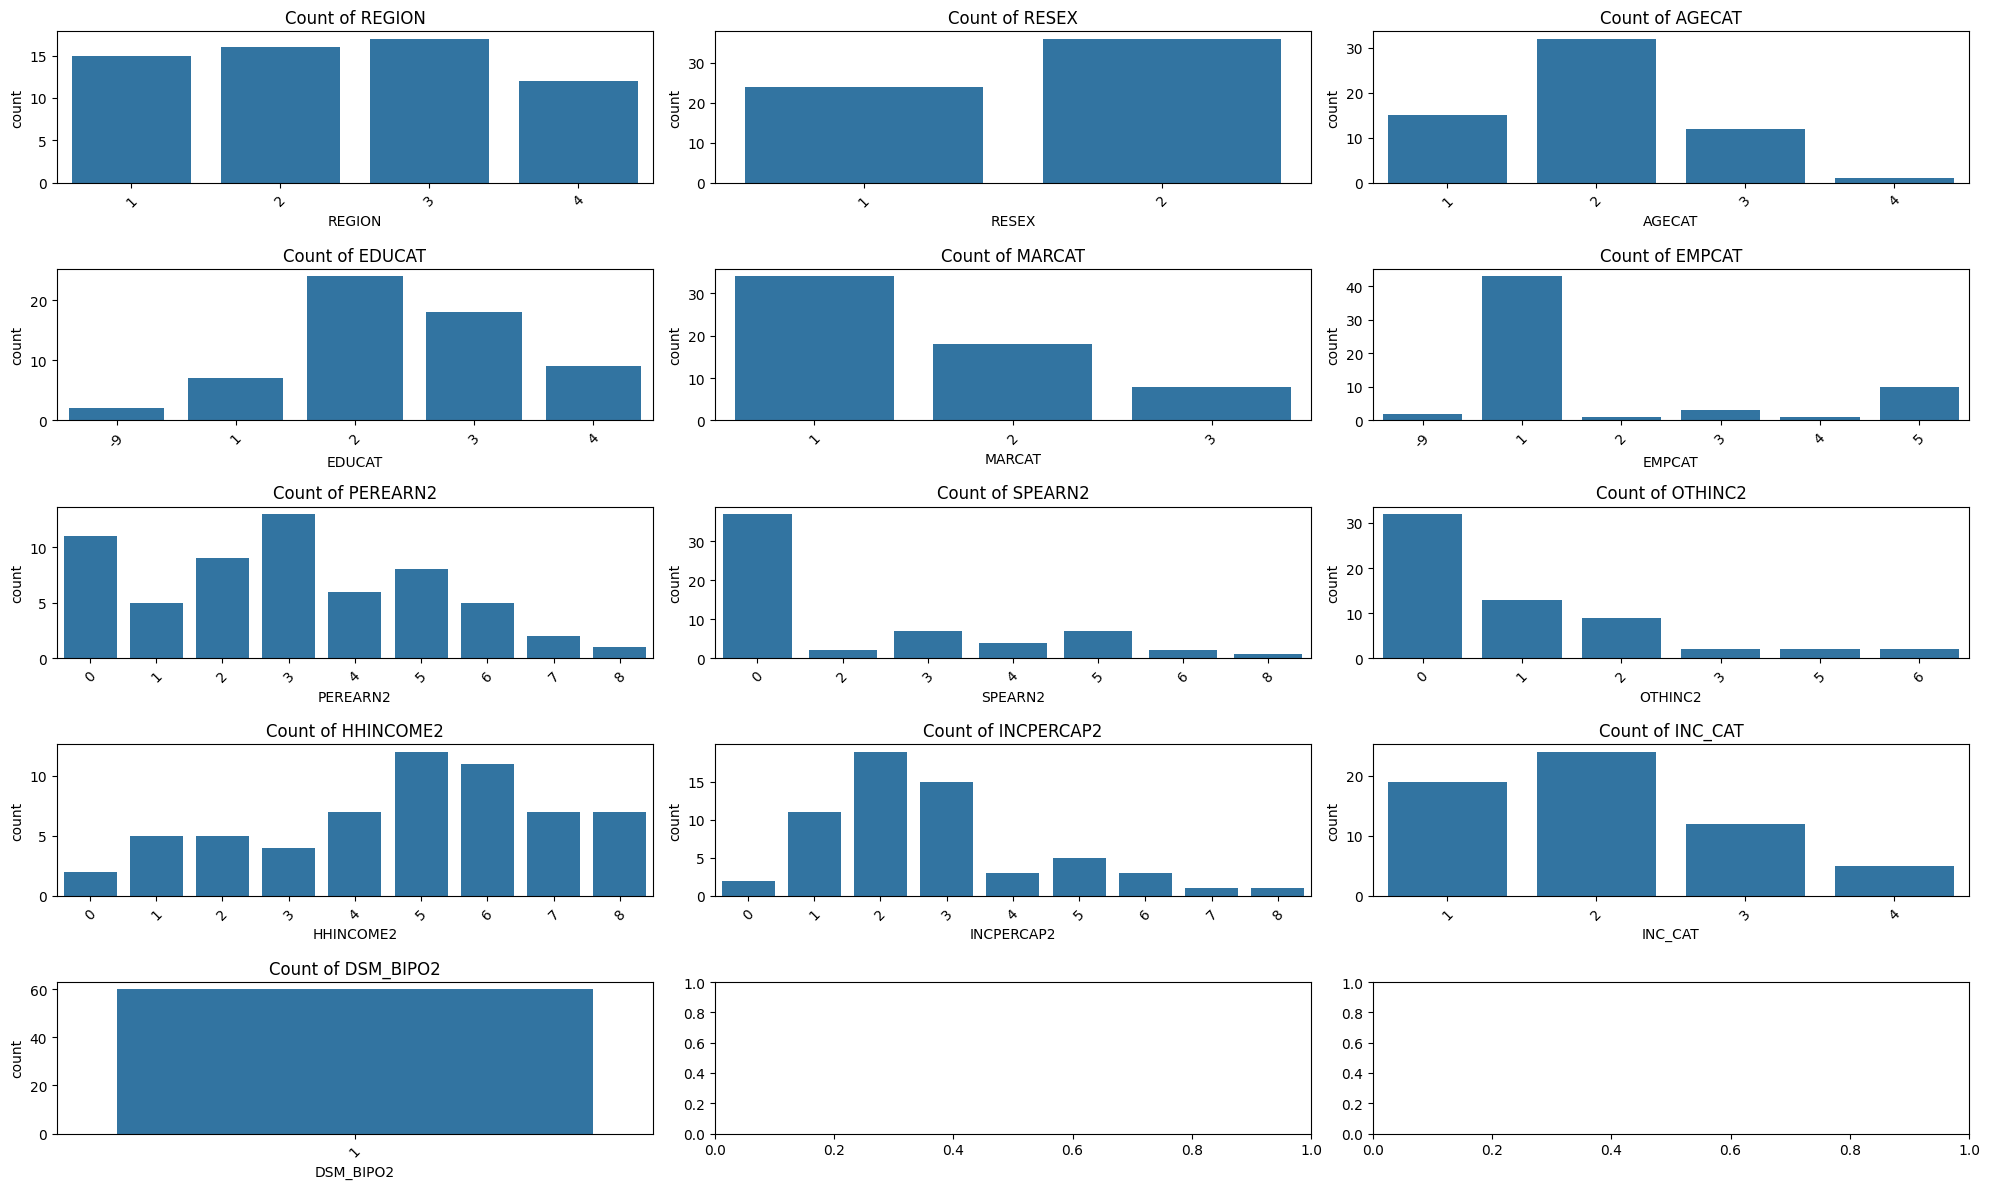

In [112]:

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_col):
    sns.countplot(x=col, data=demo_df, ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()